<a href="https://colab.research.google.com/github/PrasannaWorkshop/Regression/blob/main/Regression_Boston_Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Description



*   crim: Per capita crime rate by town.
*   zn: Proportion of residential land zoned for large lots (over 25,000 sq. ft.)
*   indus: Proportion of non-retail business acres per town.
*   chas: Charles River dummy variable (1 if tract bounds river; 0 otherwise).
*   nox: Nitric oxides concentration (parts per 10 million).
*   rm: Average number of rooms per dwelling.
*   age: Proportion of owner-occupied units built prior to 1940.
*   dis: Weighted distances to five Boston employment centers.
*   rad: Index of accessibility to radial highways.
*   tax: Full-value property-tax rate per $10,000.
*   PTRATIO - pupil-teacher ratio by town


*   B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
*   LSTAT - % lower status of the population
*   MEDV - Median value of owner-occupied homes in $1000's



This dataset provides valuable insights into the housing market dynamics and socio-economic factors influencing property values in Boston.




# Import Libraries

In [1]:
# Data manipulation
import numpy as np
import pandas as pd

# Visulaization
import seaborn as sns
import matplotlib.pyplot as plt

# for imputing missing values
from sklearn.impute import SimpleImputer

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Linear regression
from sklearn.linear_model import LinearRegression ,Ridge , Lasso , ElasticNet

# Scaler
from sklearn.preprocessing import StandardScaler

# Mean squared error
from sklearn.metrics import mean_squared_error ,r2_score


# Read the Data

In [2]:
from google.colab import files
import io

In [3]:
try :
  uploaded
except NameError :
  uploaded = files.upload()

Saving HousingData.csv to HousingData.csv


In [4]:
houseing_df = pd.read_csv(io.BytesIO(uploaded['HousingData.csv']))

In [5]:
houseing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [6]:
#checking the shape of the data
houseing_df.shape

(506, 14)

## Conclusion
* Data has been loaded succesfully
* There are 506 rows and 14 columns

# Data Check

### Check the Datatype of the columns

In [7]:
houseing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### Check for Null

In [8]:
null_columns = houseing_df.isnull().sum()

In [9]:
null_columns = null_columns[ null_columns > 0 ]

In [10]:
type(null_columns)

pandas.core.series.Series

In [11]:
null_columns.rename( 'Null_Count' )

,Null_Count
CRIM,20
ZN,20
INDUS,20
CHAS,20
AGE,20
LSTAT,20


In [12]:
houseing_df.isnull().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [13]:
houseing_df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,486.0,3.611874,8.720192,0.00632,0.081900,0.253715,3.560263,88.9762
ZN,486.0,11.211934,23.388876,0.00000,0.000000,0.000000,12.500000,100.0000
INDUS,486.0,11.083992,6.835896,0.46000,5.190000,9.690000,18.100000,27.7400
CHAS,486.0,0.069959,0.255340,0.00000,0.000000,0.000000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.538000,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.208500,6.623500,8.7800
AGE,486.0,68.518519,27.999513,2.90000,45.175000,76.800000,93.975000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.207450,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.000000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.000000,666.000000,711.0000


In [14]:
houseing_df.skew()

,0
CRIM,5.212843
ZN,2.256613
INDUS,0.303722
CHAS,3.382293
NOX,0.729308
RM,0.403612
AGE,-0.582470
DIS,1.011781
RAD,1.004815
TAX,0.669956


### Check for Duplicate rows

In [15]:
houseing_df.duplicated().sum()

np.int64(0)

## Conclusion and Inference


*   Few columns have nulls
*   There are no duplicate rows
*   Most of the columns are skewed ie - indicates that outliers are present



# Data Preprocessing and Cleaning

In [16]:
houseing_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


## Treating null values

In [17]:
houseing_df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [18]:
houseing_df[ houseing_df.isna().any(axis =1 ) ]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,NaN,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,NaN,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,NaN,29.8
479,14.33370,0.0,18.10,NaN,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4


In [19]:
mask = houseing_df.isna().any(axis =1 )

In [20]:
houseing_df['CRIM'] = houseing_df['CRIM'].fillna(houseing_df['CRIM'].median())
houseing_df['ZN'] = houseing_df['ZN'].fillna(houseing_df['ZN'].median())
houseing_df['INDUS'] = houseing_df['INDUS'].fillna(houseing_df['INDUS'].median())
houseing_df['CHAS'] = houseing_df['CHAS'].fillna(houseing_df['CHAS'].median())
houseing_df['AGE'] = houseing_df['AGE'].fillna(houseing_df['AGE'].median())
houseing_df['LSTAT'] = houseing_df['LSTAT'].fillna(houseing_df['LSTAT'].median())

In [21]:
houseing_df[mask]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,11.43,36.2
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9
14,0.63796,0.0,8.14,0.0,0.538,6.096,84.5,4.4619,4,307,21.0,380.02,10.26,18.2
35,0.06417,0.0,5.96,0.0,0.499,5.933,68.2,3.3603,5,279,19.2,396.90,11.43,18.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,4.64689,0.0,18.10,0.0,0.614,6.980,67.6,2.5329,24,666,20.2,374.68,11.43,29.8
479,14.33370,0.0,18.10,0.0,0.614,6.229,88.0,1.9512,24,666,20.2,383.32,13.11,21.4
482,5.73116,0.0,18.10,0.0,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,11.43,22.4


## Replace missing values with Median

In [22]:
houseing_df.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


## Conclusion


*   Missing Data has been treated



# Exploratory Data Analysis (EDA)

## Univariate data analysis

In [23]:
houseing_df['CRIM']

,CRIM
0,0.00632
1,0.02731
2,0.02729
3,0.03237
4,0.06905
...,...
501,0.06263
502,0.04527
503,0.06076
504,0.10959


In [24]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

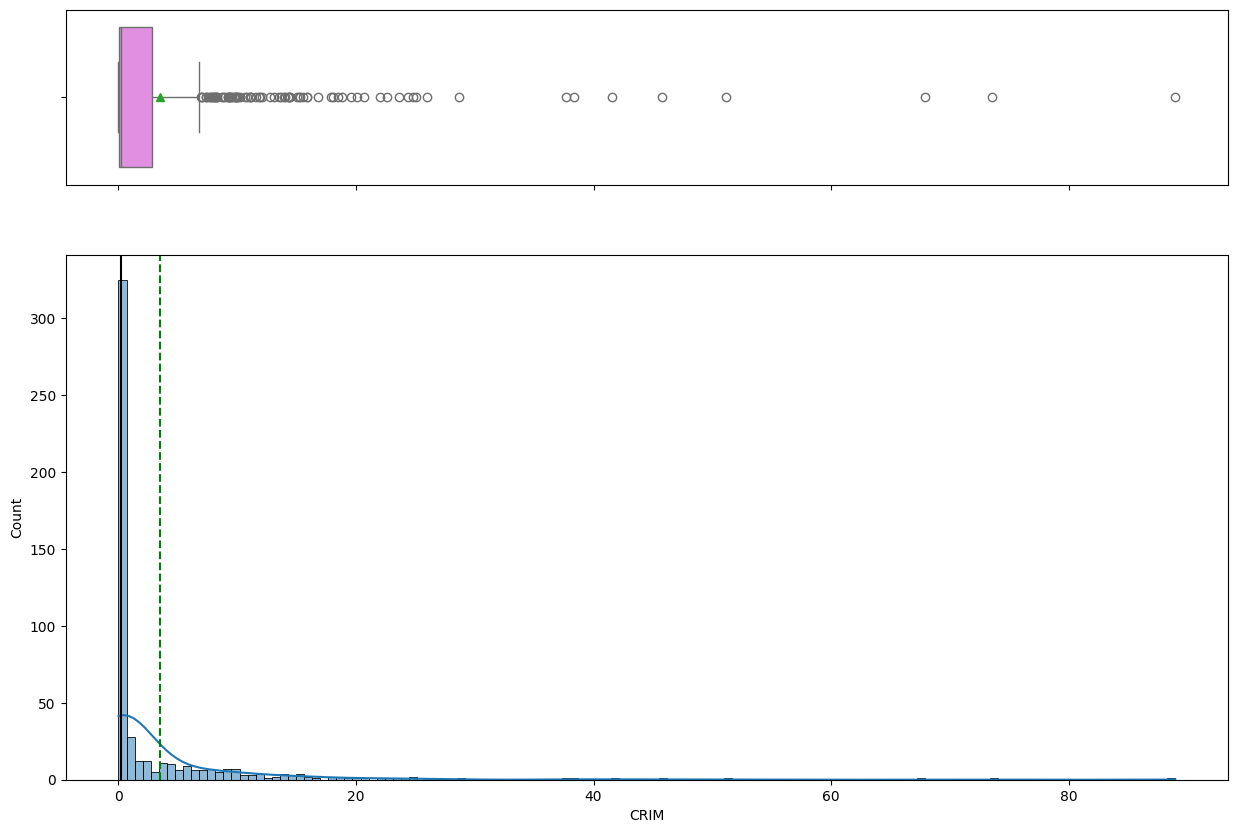

In [25]:
histogram_boxplot(houseing_df ,'CRIM')

## Inference
CRIM
Crim  ( Per capita rate by town ) is right skewed .
The distribution shows that most of the area have low crime rate , with few area having higher crime rate values
These are outlier and needed to be treated

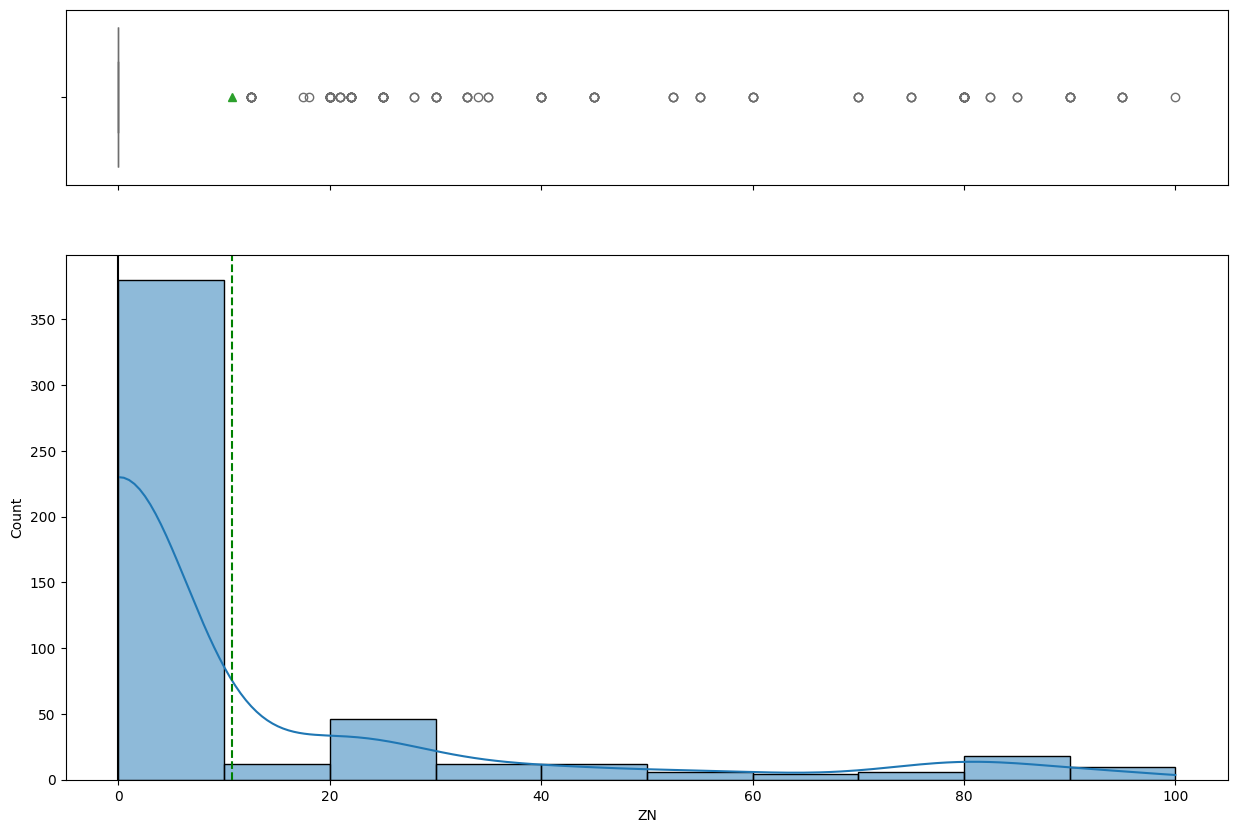

In [26]:
histogram_boxplot(houseing_df ,'ZN')

## Infernce
zn: Proportion of residential land zoned for large lots (over 25,000 sq. ft.)
The ZN is right skewed .
Meaning most of the area having zn proption to zero indicating that there are very less land that is reserved for large lots over 25000sqft ,ie most of the land are of small lots  

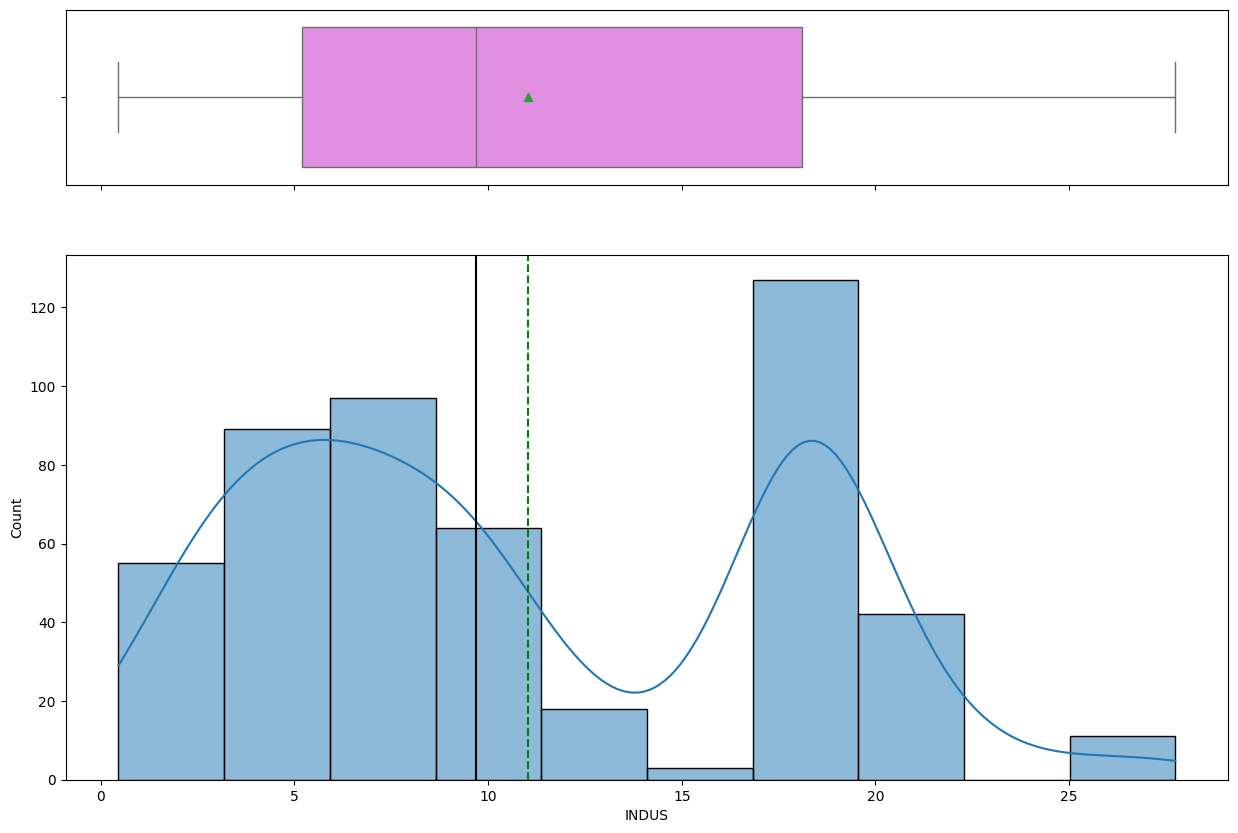

In [27]:
histogram_boxplot(houseing_df ,'INDUS')

## Infernce
Indus (Proportion of non-retail business acres per town.)
From the histogram we see that the Indus is bimodal ( 3-9 and 18-20)
The distribution is complex which is not symetric nor it is skewed
This means that few areas  might have more proption of non-retial business or few might have less proption.

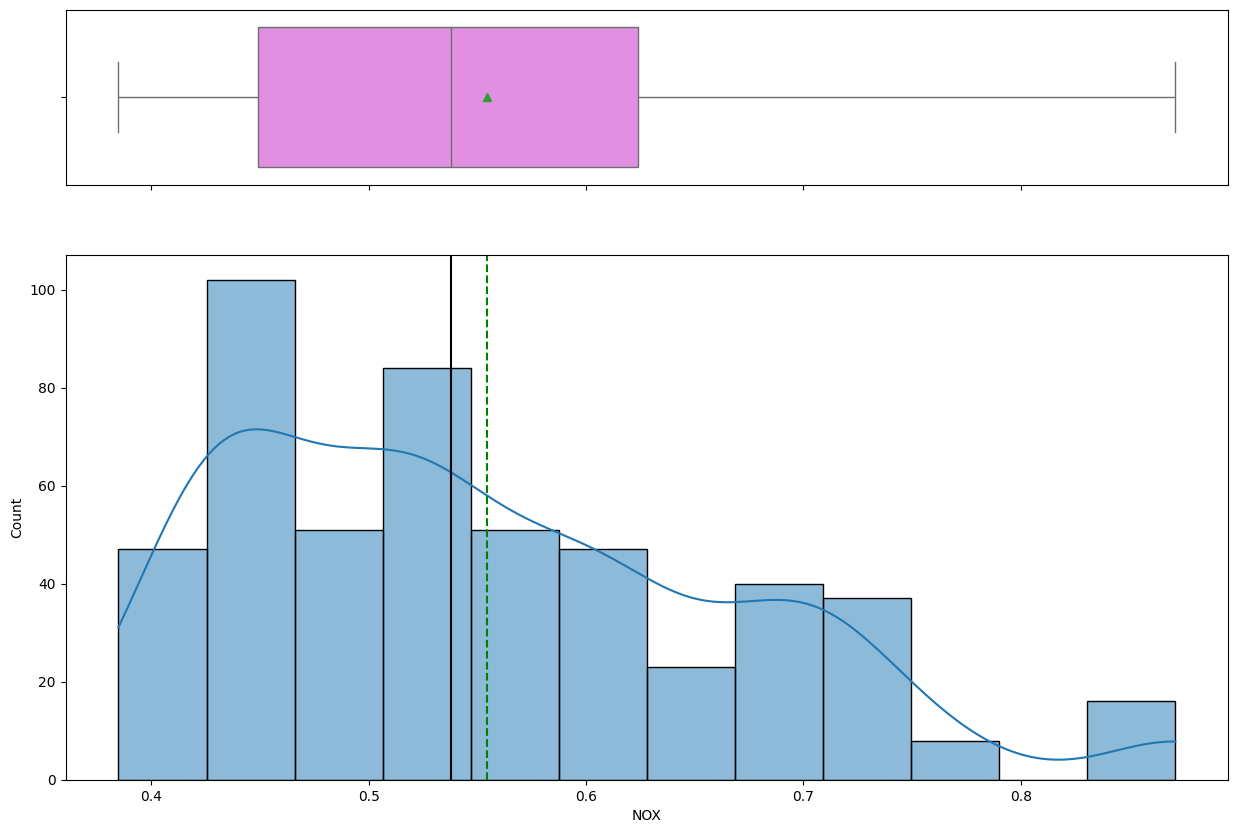

In [28]:
histogram_boxplot(houseing_df ,'NOX')

## Infernce

> Add blockquote


nox: Nitric oxides concentration (parts per 10 million).
The histogram or distribution is right skewed
With median and average between 0.5 to 0.6 indicating the Nox level are low in most of the areas

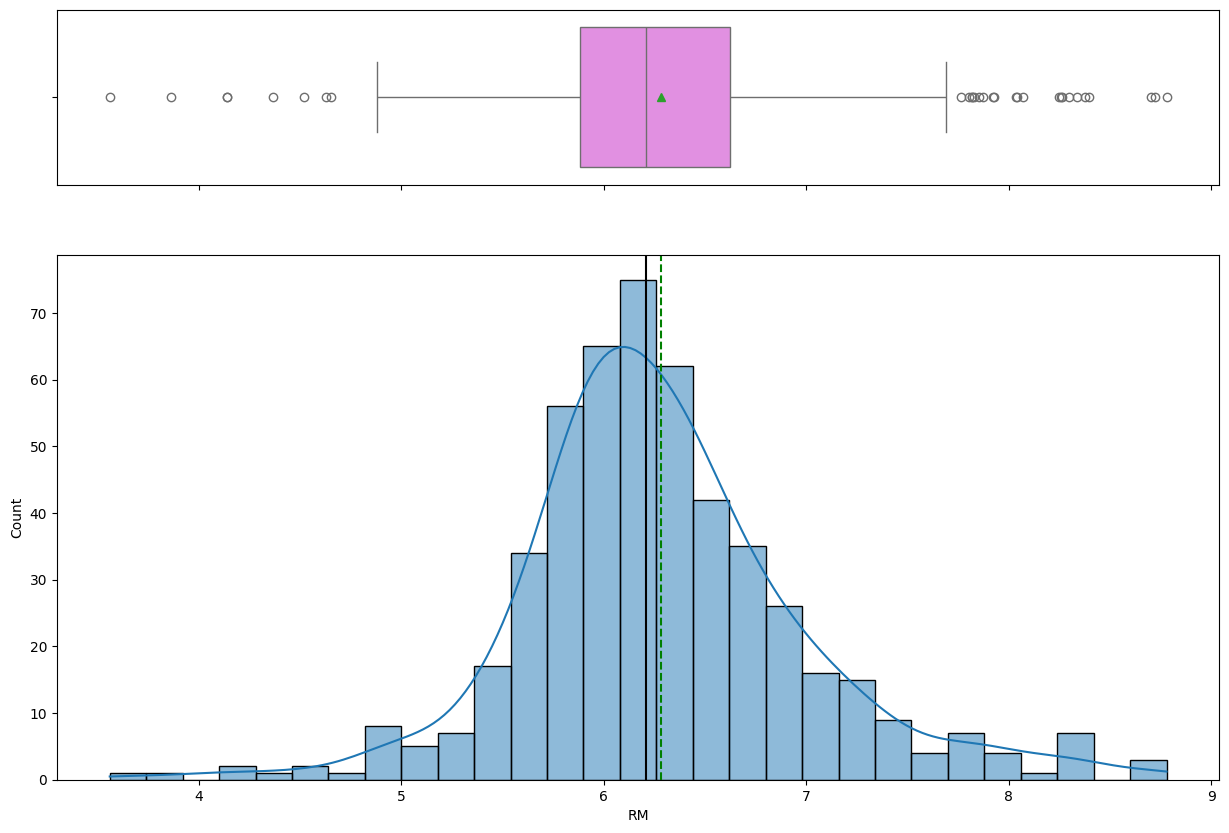

In [29]:
histogram_boxplot(houseing_df ,'RM')

## Infernce
rm: Average number of rooms per dwelling.
Rm variable is almost normally distrubuted which is skewed slightly to the right
Most of the areas have 6.2 to 6.3 rooms

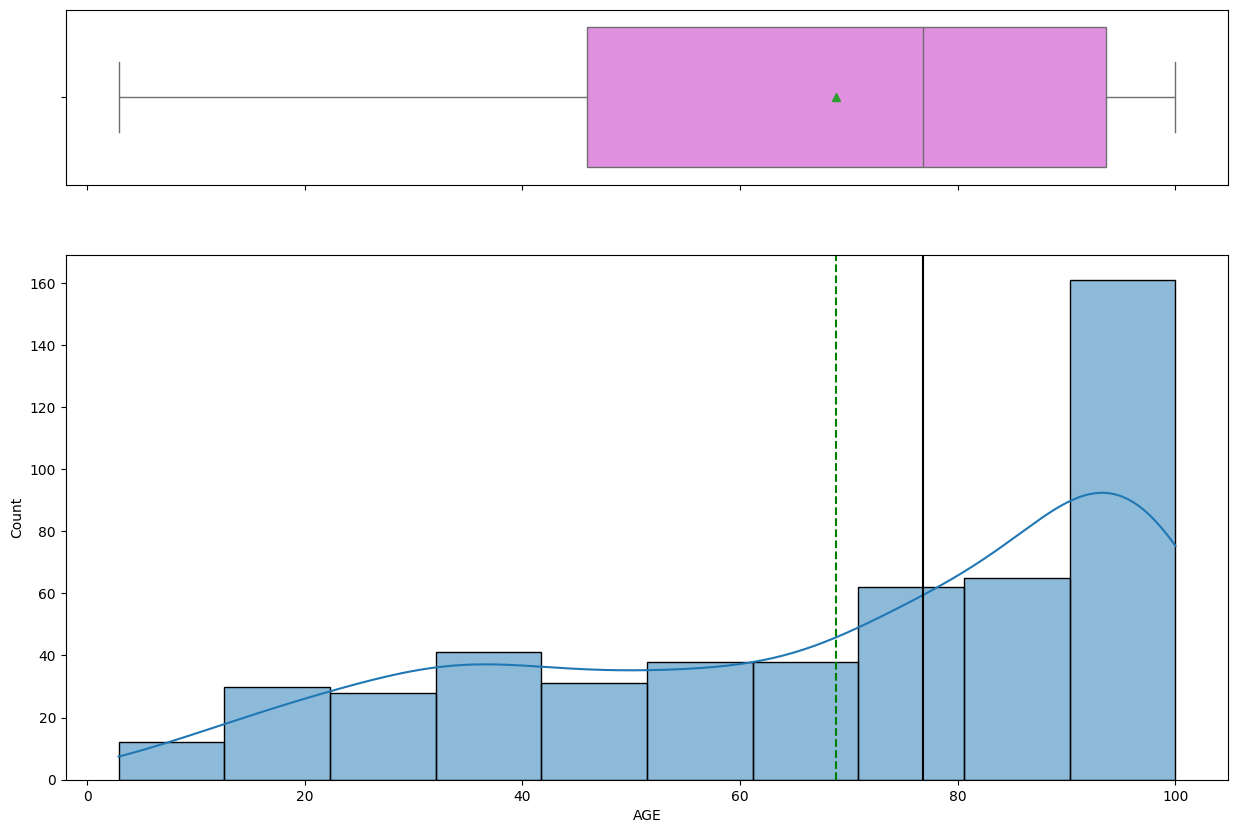

In [30]:
histogram_boxplot(houseing_df ,'AGE')

## Infernce
age: Proportion of owner-occupied units built prior to 1940.
The data is skewed towards left
having max count at 100 , indicating many of the houses are quit old .


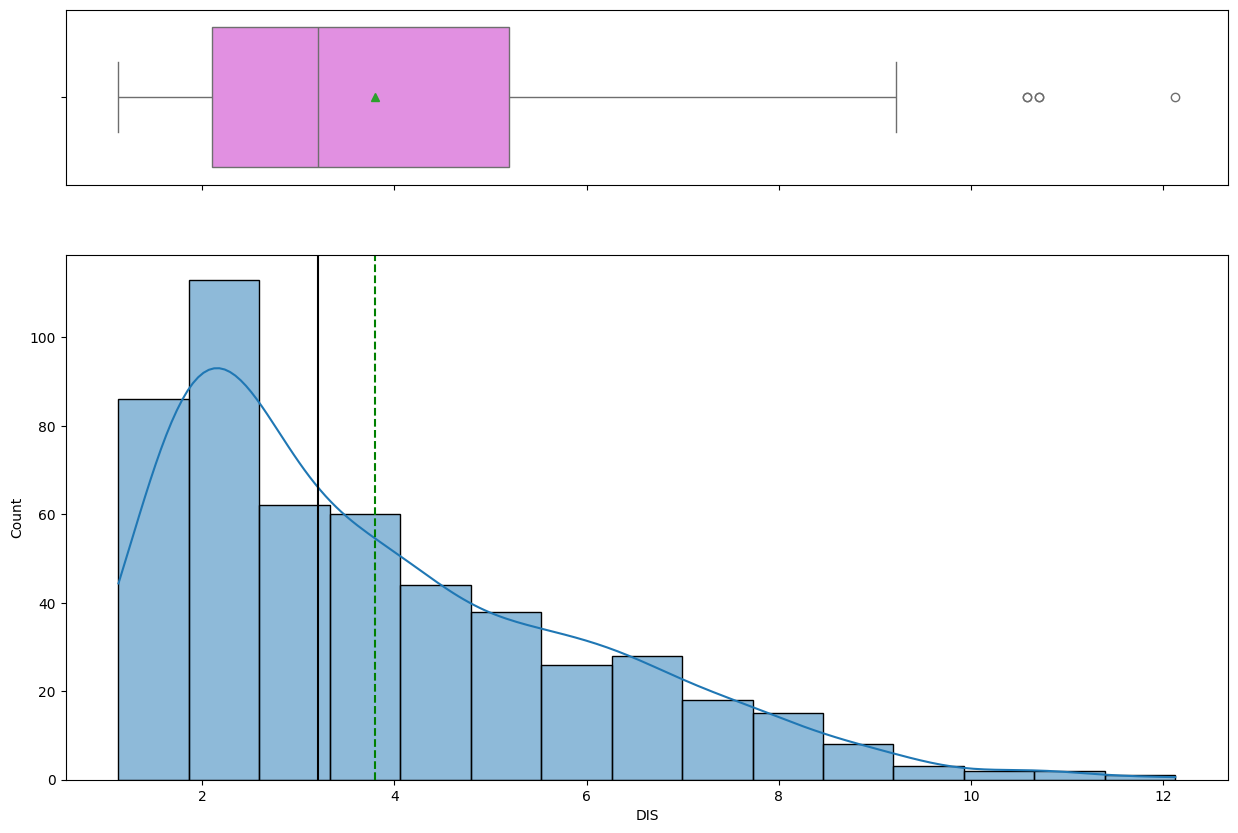

In [31]:
histogram_boxplot(houseing_df ,'DIS')

## Infernce
dis: Weighted distances to five Boston employment centers.
The distribution is skewed right
and mode of the distribution is 2-3 meaning most of the houses are
closer to the employment center


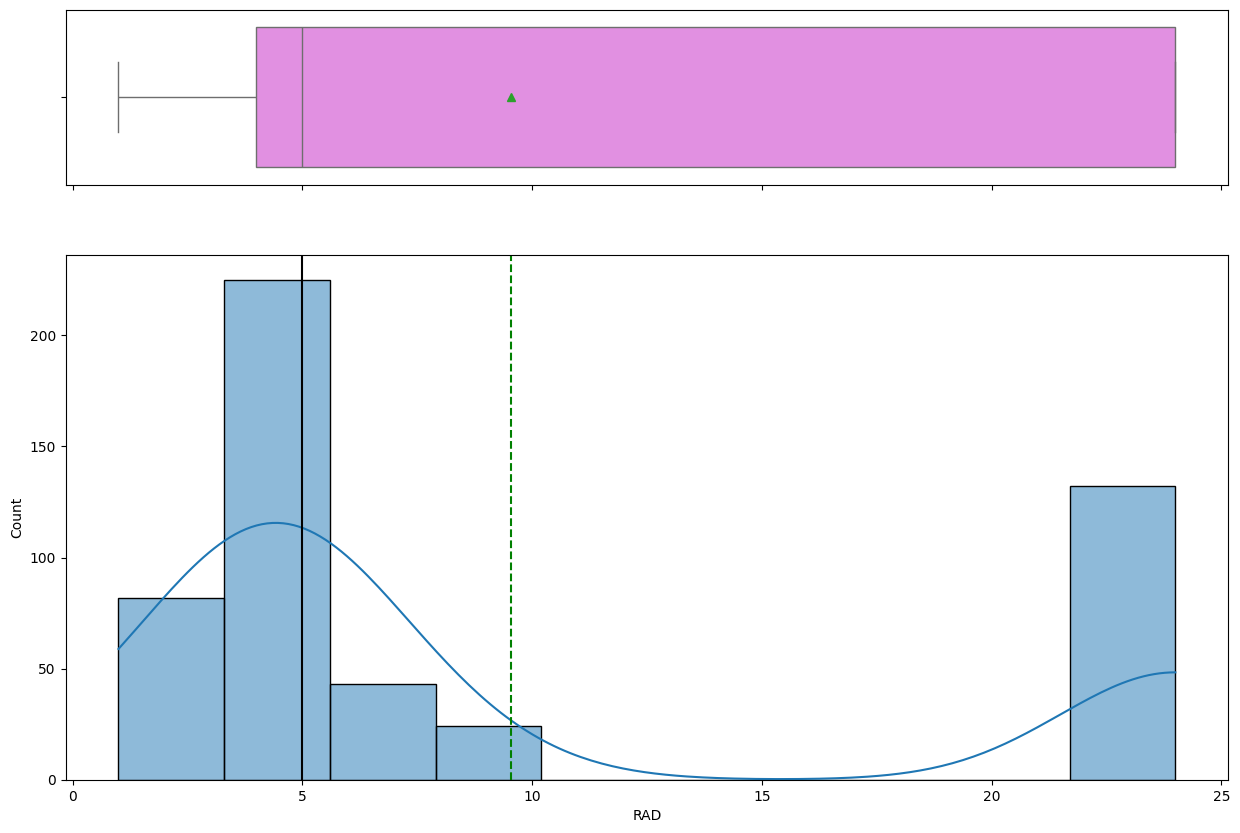

In [32]:
histogram_boxplot(houseing_df ,'RAD')

## Infernce
rad: Index of accessibility to radial highways.
we see a complicated distribution
it has two modes 5 and 22-24 meaning
there are two cluster of houses one who are located near to highways
another cluster who are far away from the radial highways .



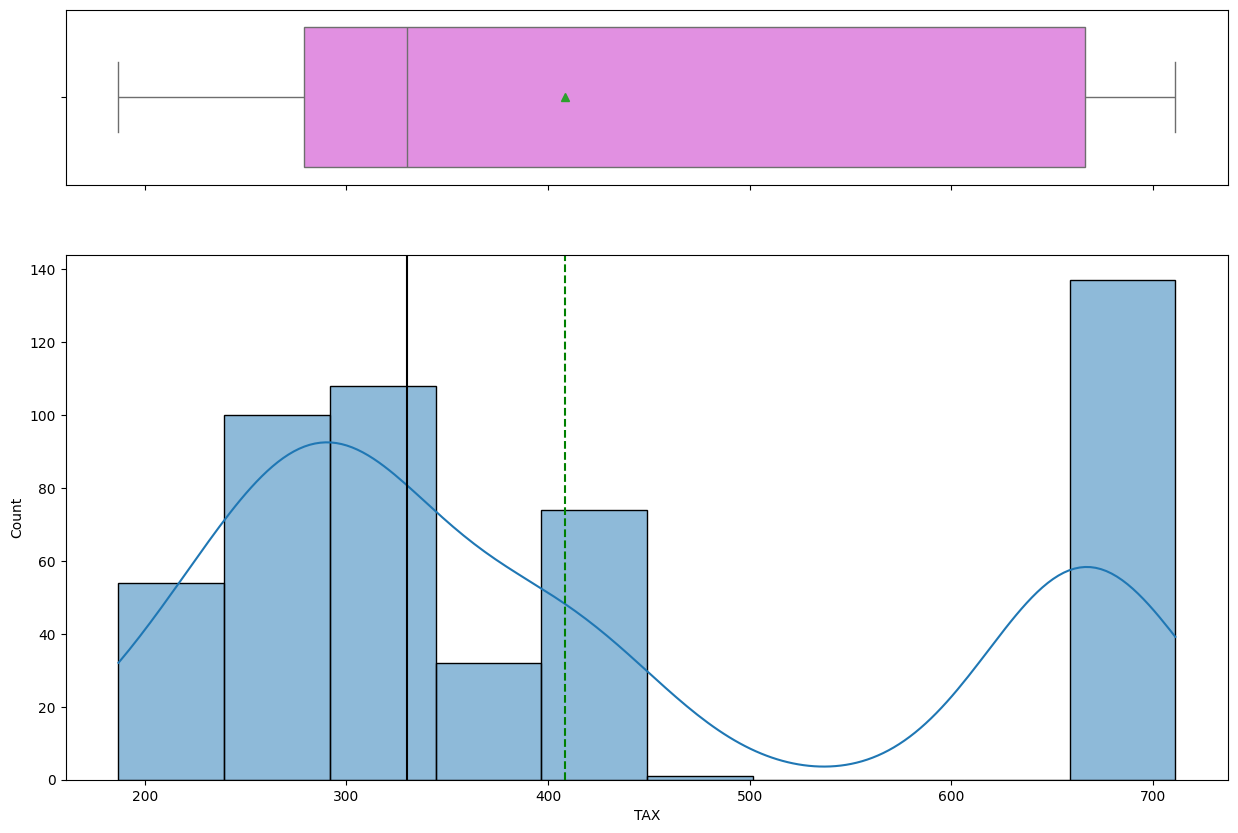

In [33]:
histogram_boxplot(houseing_df ,'TAX')

## Infernce
tax: Full-value property-tax rate per $10,000.
we see a complex distribution with two peaks  ie , meaning two cluster one having are being low tax paying area and one cluster payer high tax paying area

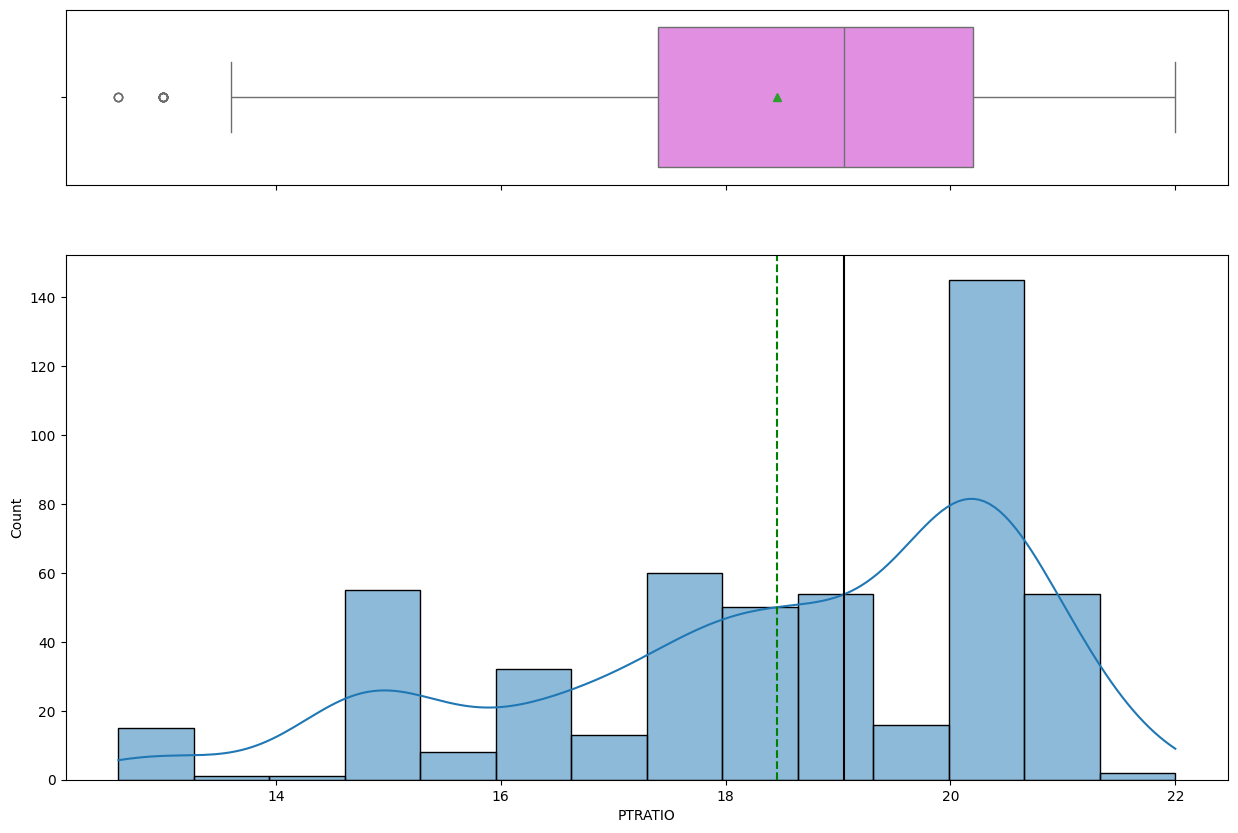

In [34]:
histogram_boxplot(houseing_df ,'PTRATIO')

## Infernce
PTRATIO - pupil-teacher ratio by town
The distribution is left skewed
max PTration is 20 meaning most of the areas have very less teacher than students . meaning their are more childrens or schools have large student population  or more number of students per classroom


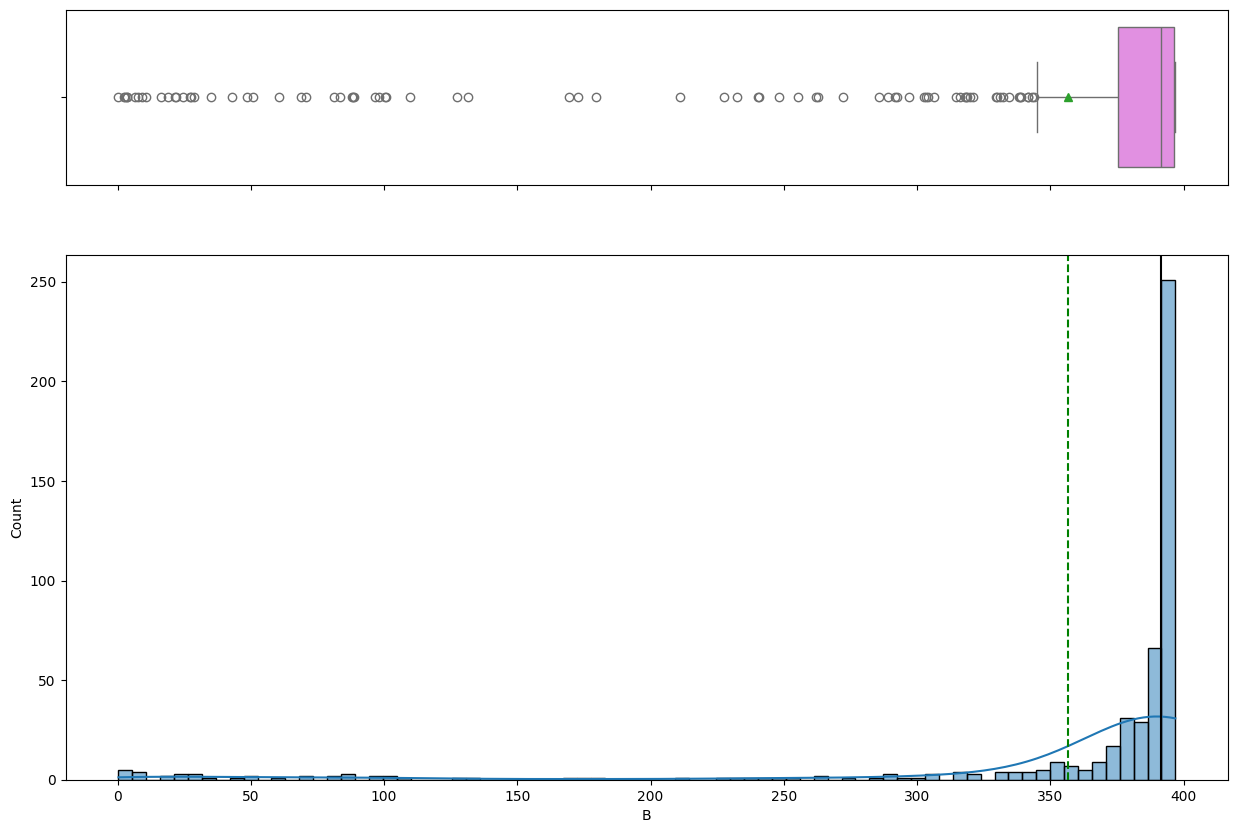

In [35]:
histogram_boxplot(houseing_df ,'B')

## Infernce
B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
The histogram of B (1000 × (Bk − 0.63)²) shows a highly right-skewed distribution, with a large concentration of values near 400. This indicates that in most towns, the proportion of Black residents (Bk) is very close to 0.63.

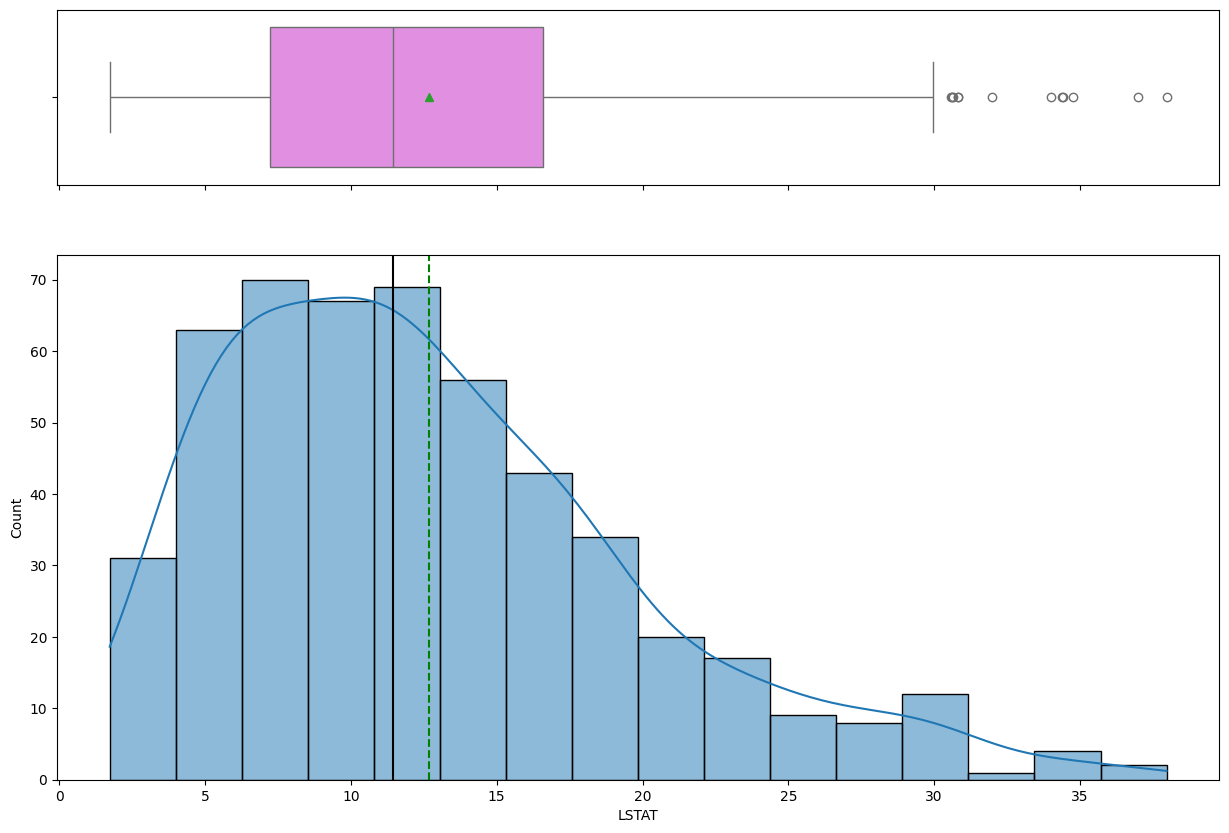

In [36]:
histogram_boxplot(houseing_df ,'LSTAT')

## Infernce
LSTAT - % lower status of the population
"Lower status of the population" generally refers to individuals or groups with less social and economic power, influence, and opportunities compared to those with higher status

The LSTAT distribution is right skewed .
Majority of the count is between 5-15 and these are Low percentage LSTAT
area .
Hence most of the area population are having low social and econimic condition

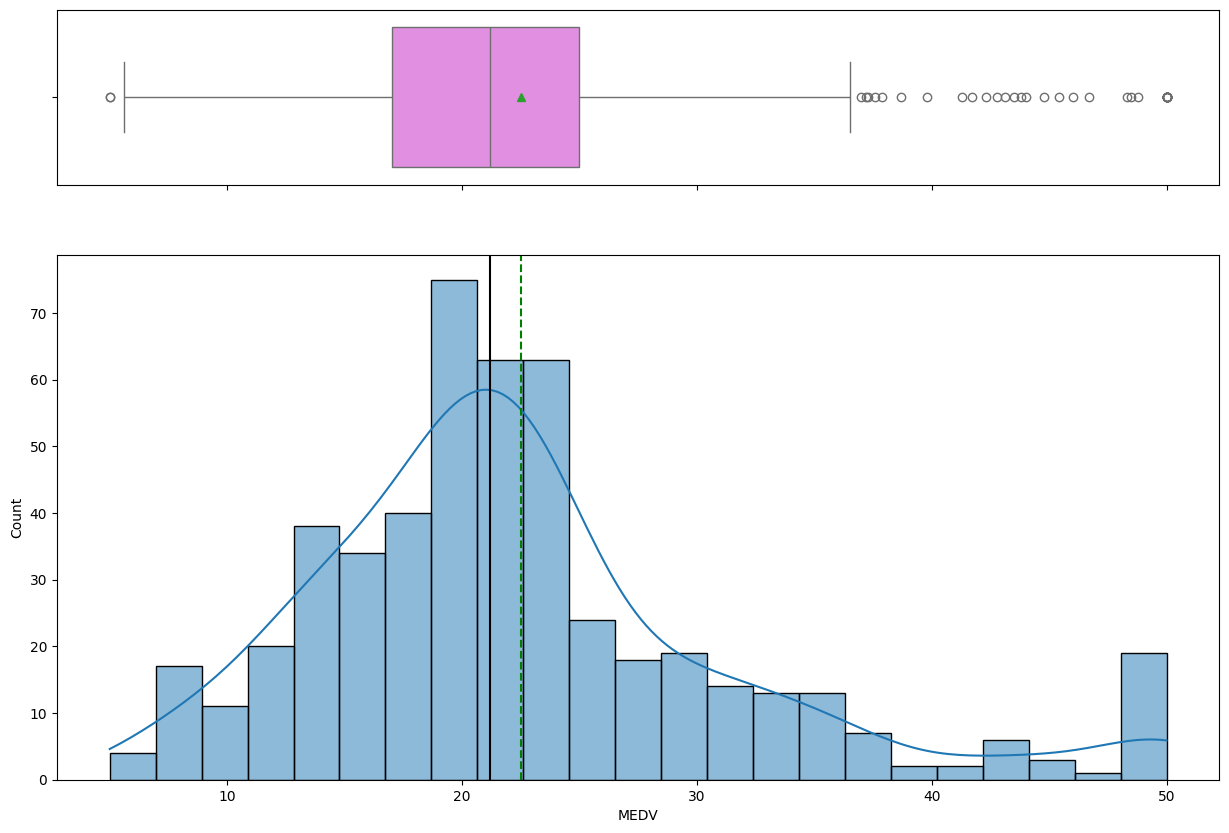

In [37]:
histogram_boxplot(houseing_df ,'MEDV')

##  Infernce
MEDV - Median value of owner-occupied homes in $1000's

* The distrubtion is almost normal and is right skewed

* Most of the  houses are between `$19k -$24k range

* There are few outlier houses more than '50k dollar' are capped at 50k dollar

* This is our target varaible

CHAS

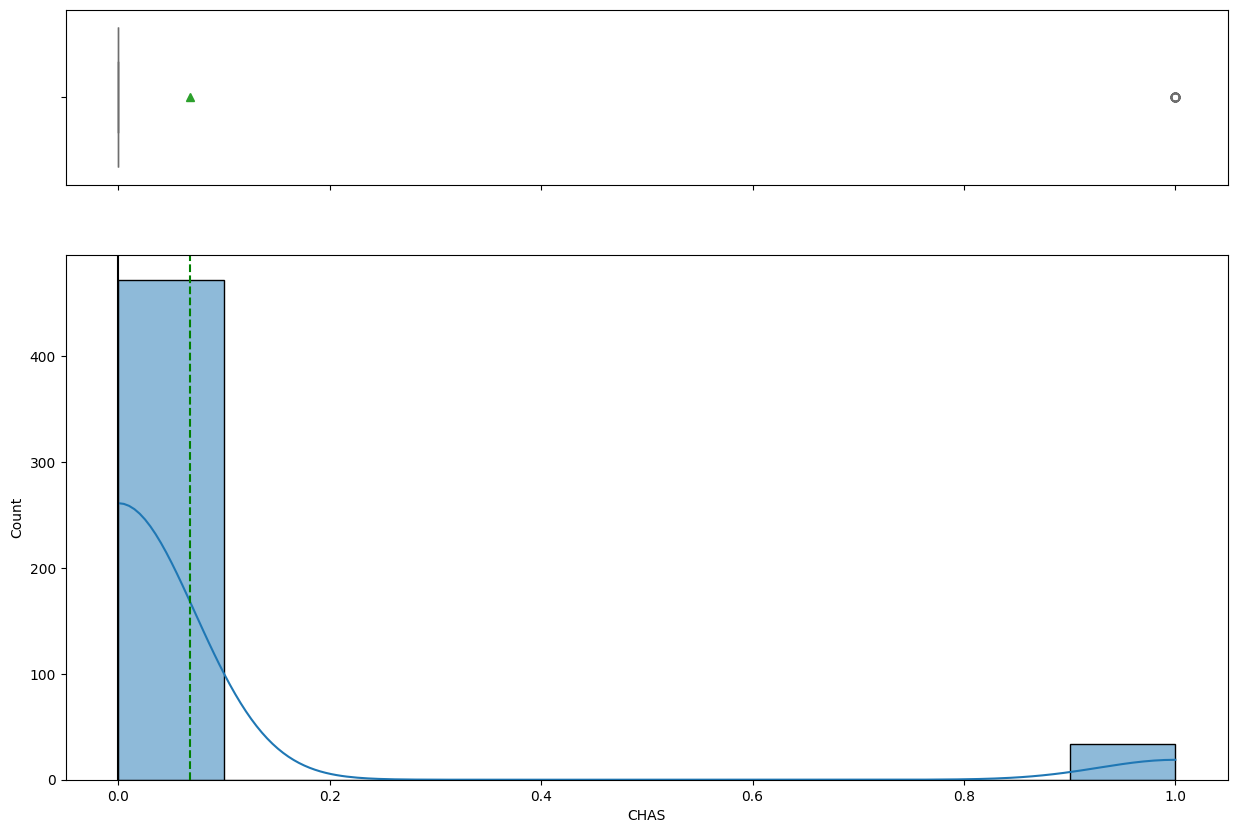

In [38]:
histogram_boxplot(houseing_df ,'CHAS')

##  Infernce
Most of the areas are not near to charles river .
This is a categorical variable

## Bivarate Analysis

## Quantitative vs Quantitave

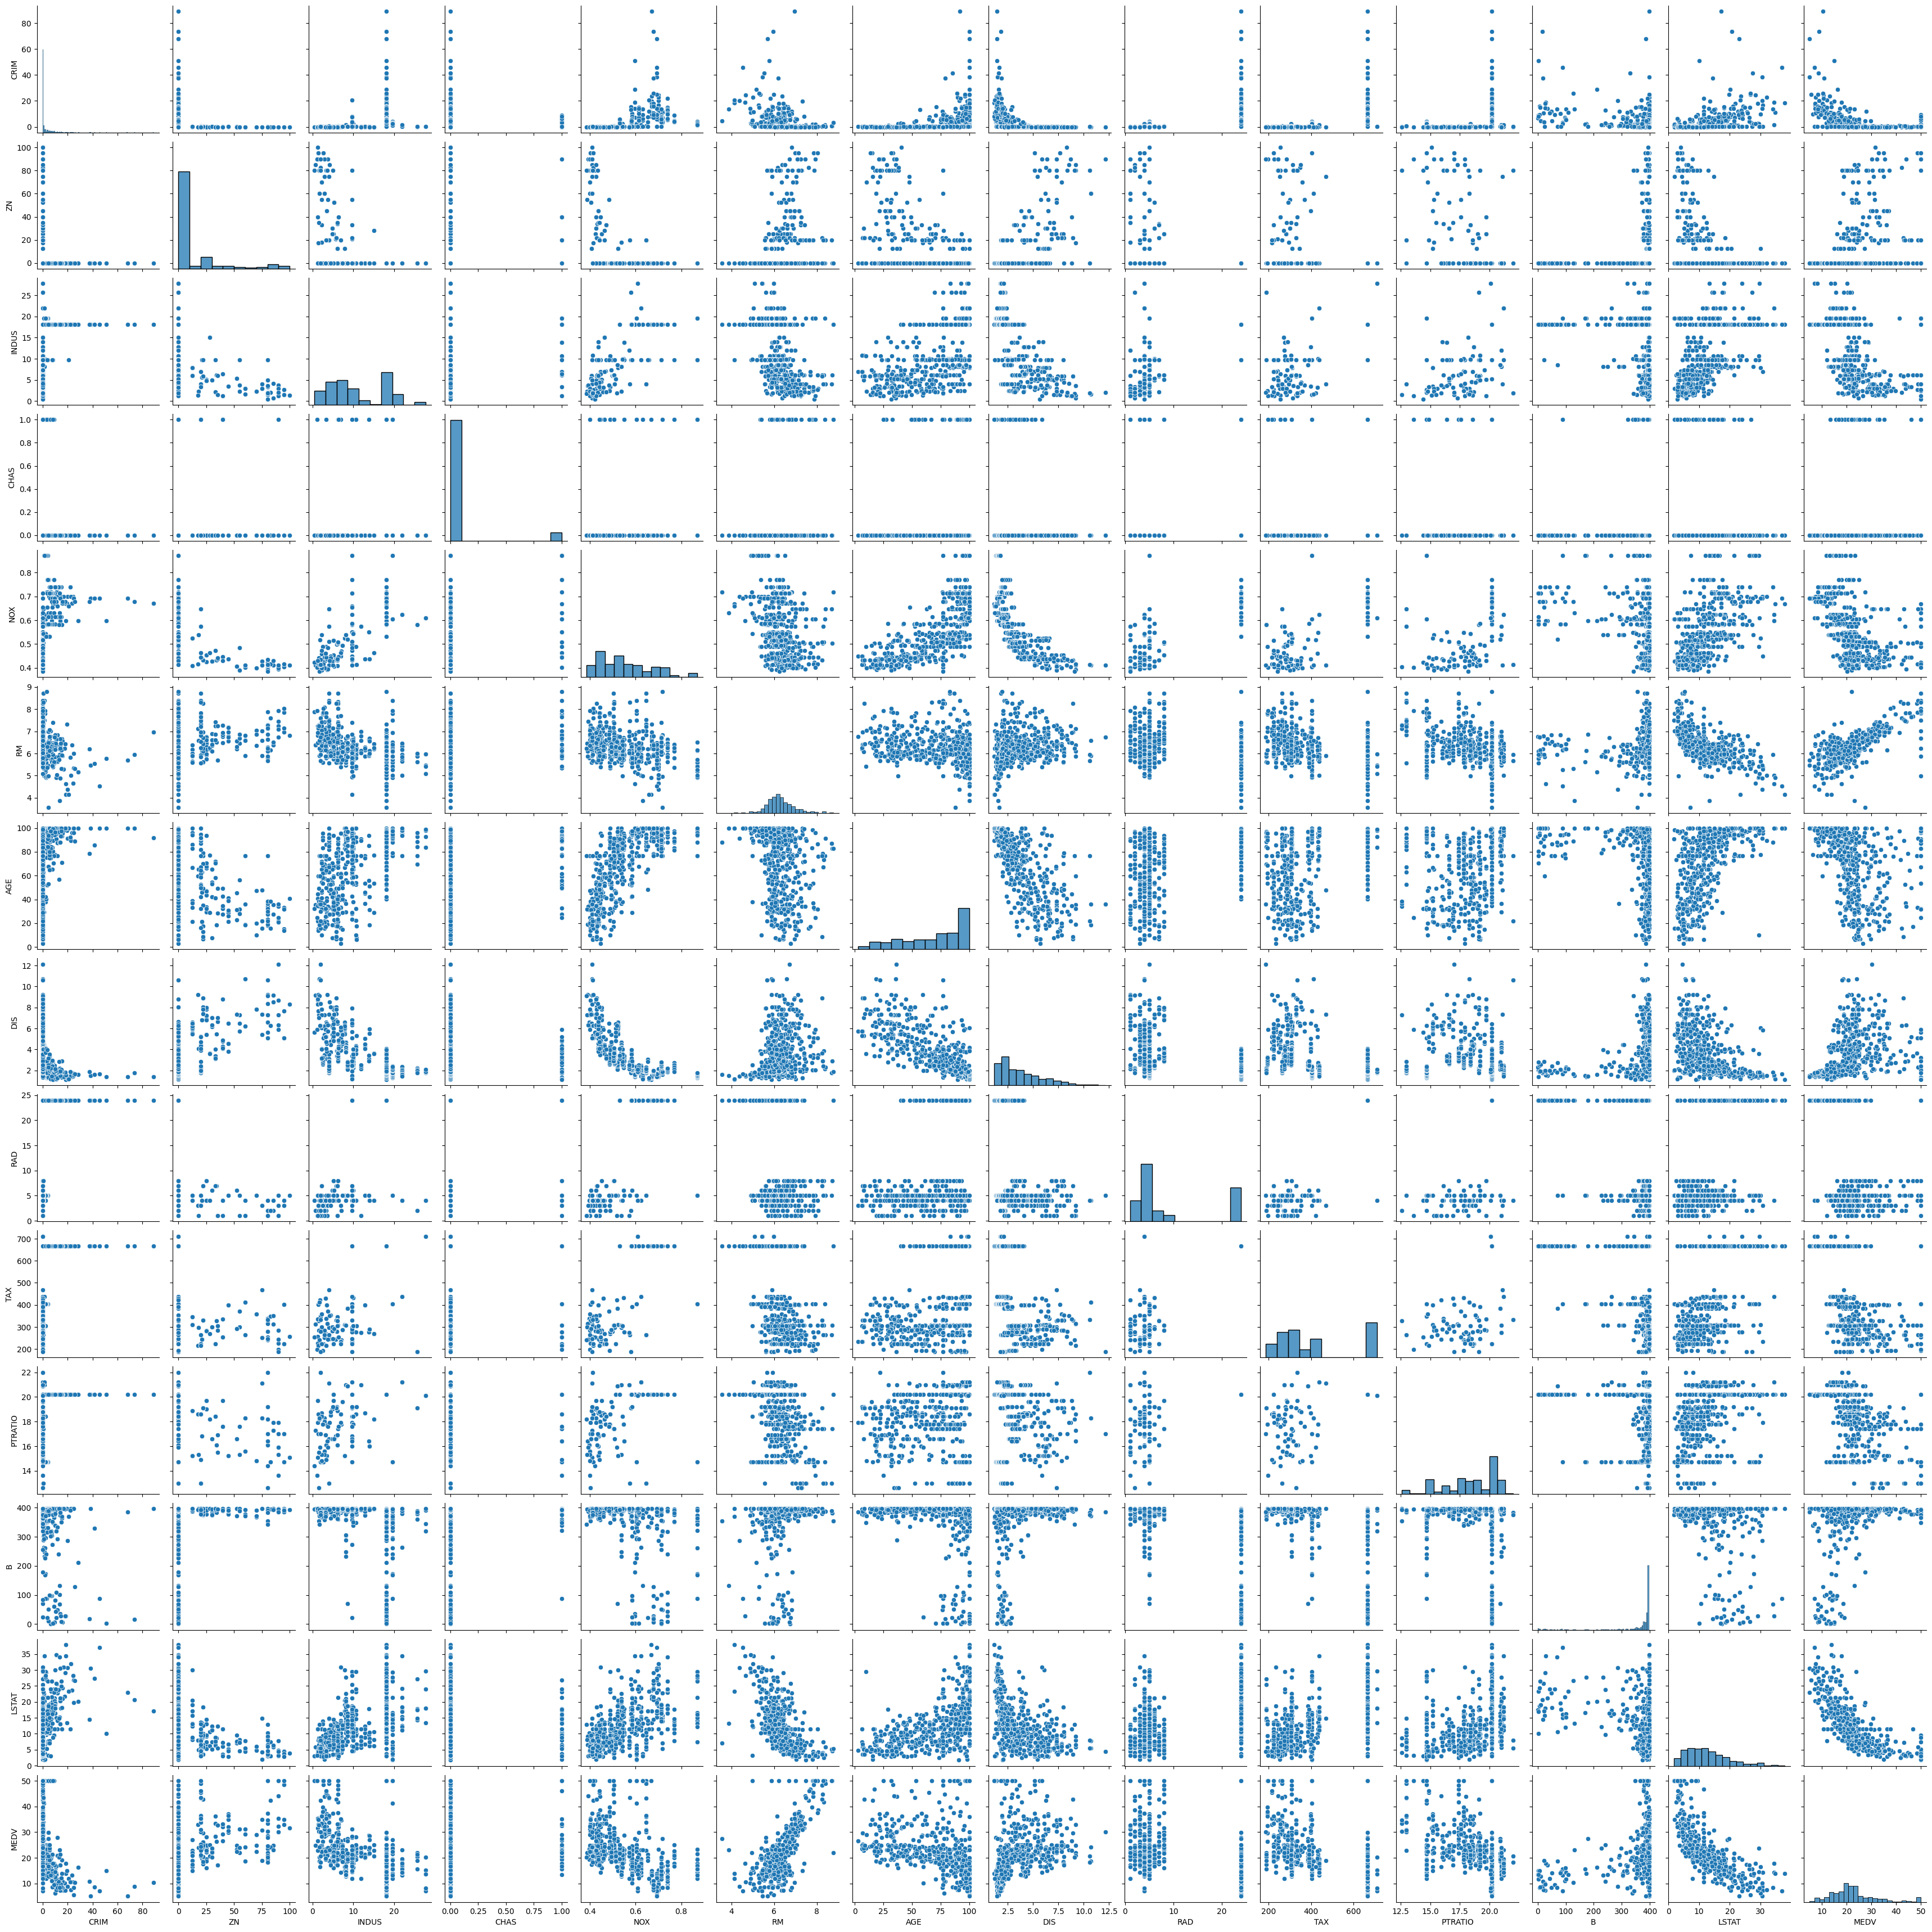

In [39]:
sns.pairplot(data = houseing_df)


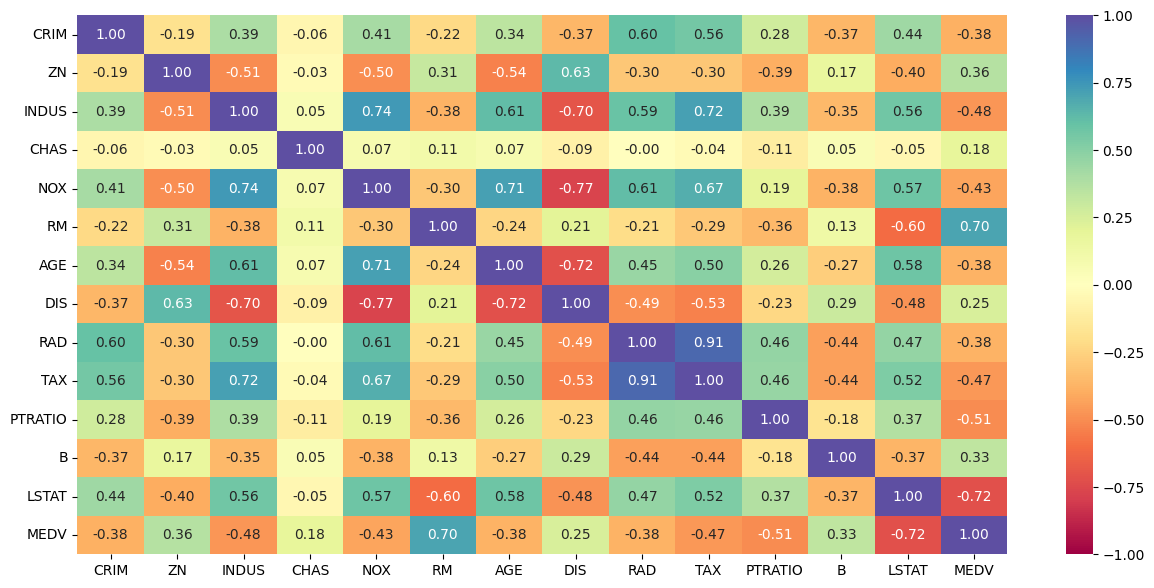

In [40]:
# To create the heatmap, I'll create a list of only the numerical variables
corr_list = houseing_df.select_dtypes(include=np.number).columns.tolist()

# Now let's plot the heatmap
plt.figure(figsize=(15, 7))
sns.heatmap(
    houseing_df[corr_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

## Inference
* MEDV : few columns like RM and LSTAT have strong corelation with MDEV , Nox,PTRATIO also have good correlation with MDEV which would mean this predictors will play a vital role in predicting the the Median home value

* Few of the predictors or independent variables are storngly coreleated to each other , which indicates multicolinearity is present , hence we might have to drop few independent variables or create a new one

# Outlier Treatment

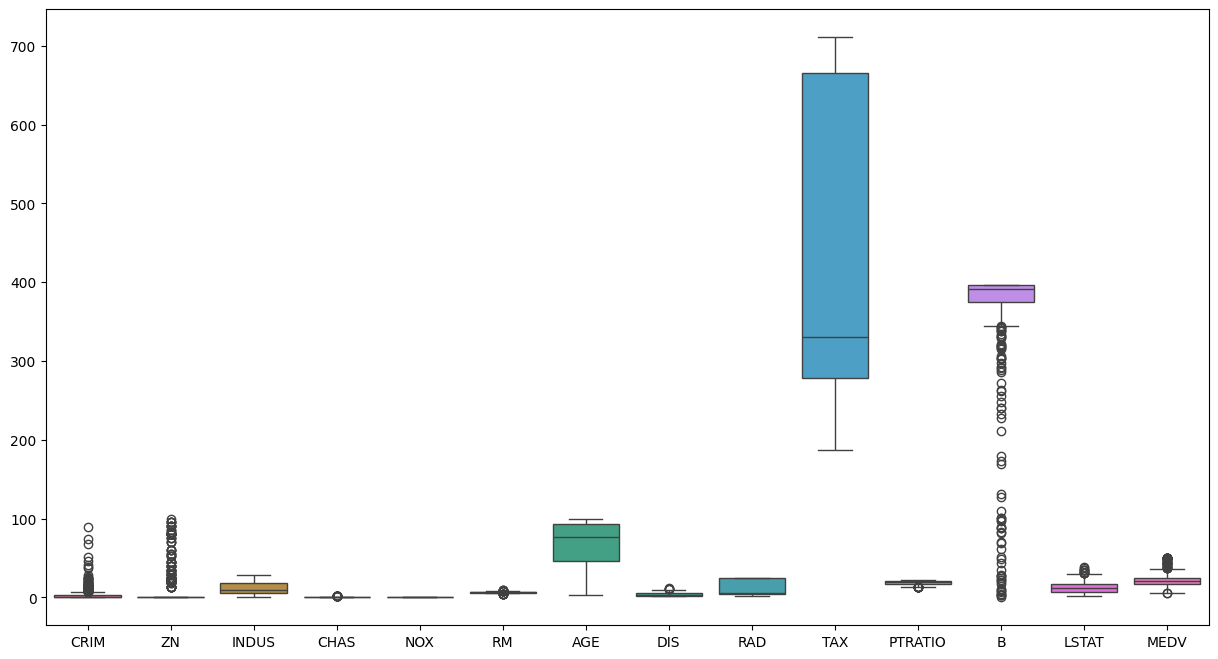

In [41]:
plt.figure(figsize=(15,8))
ax = sns.boxplot( data=houseing_df)

In [42]:
def treat_outliers_iqr(df, column):
    """Treat outliers in a DataFrame column using the IQR method.

    Args:
        df (pd.DataFrame): The input DataFrame.
        column (str): The column to treat outliers in.

    Returns:
        pd.DataFrame: The DataFrame with treated outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR



    # Capping
    capped_df = df.copy()
    capped_df[column] = capped_df[column].clip(lower=lower_bound, upper=upper_bound)

    return capped_df

In [43]:
for col in houseing_df.columns:
    houseing_df = treat_outliers_iqr(houseing_df, col)

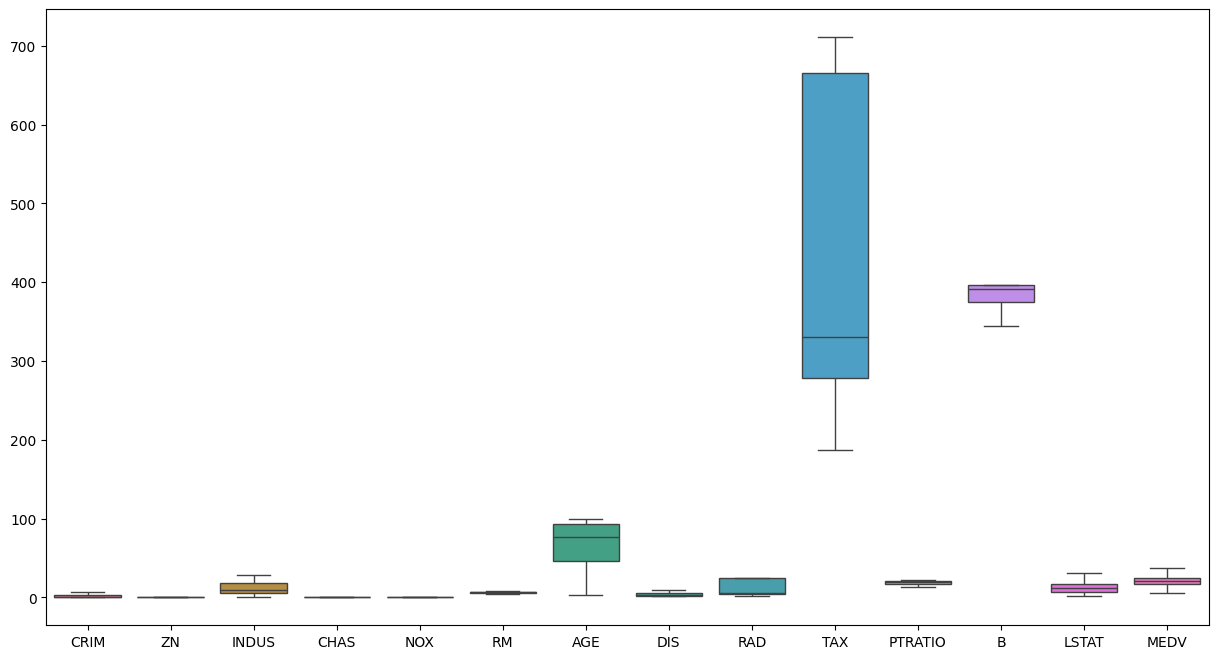

In [44]:
plt.figure(figsize=(15,8))
ax = sns.boxplot( data=houseing_df)

## Inference
The outlier are removed for the Data

# Train Test split

In [45]:
X = houseing_df.drop('MEDV', axis=1)
y = houseing_df['MEDV']

In [46]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)

# Training the Linear regression Model - Not standardized Data

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Making Prediction

In [48]:
y_pred = model.predict(X_test)
y_train_predict = model.predict(X_train)

# Model Evaluatoion

In [60]:

# Calculate and print R^2 score.
r2_train = r2_score(y_train, y_train_predict)
print(f"R-squared: {r2:.4f}")

R-squared: 0.7737


In [61]:
from sklearn.metrics import mean_squared_error, r2_score


# Calculate and print R^2 score.
r2_test = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.4f}")

R-squared: 0.7737


In [63]:
print(f"R2 Score on Train data : {r2_train}")
print(f"R2 Score on Test data : {r2_test}")

R2 Score on Train data : 0.76516670197091
R2 Score on Test data : 0.7736624495332507


In [62]:
model.coef_

array([-5.50040367e-01, -6.75119682e-14, -4.75344056e-02,  1.37737044e-14,
       -1.44383738e+01,  2.91703781e+00, -1.63305210e-02, -9.74395729e-01,
        2.51751358e-01, -6.14134476e-03, -9.45474672e-01,  4.02307547e-03,
       -4.72435938e-01])

In [51]:
model.intercept_

np.float64(40.00400060800734)

In [52]:
s = ""
first = True
for col , coef in  zip(X_train.columns , model.coef_ ):
  if first == True :
    first = False
    s = s + f' (  {round(coef,2)} * {col} )'
  else :
    s = s + f' + ( {round(coef,2)} * {col} ) \n '
print(s)

 (  -0.55 * CRIM ) + ( -0.0 * ZN ) 
  + ( -0.05 * INDUS ) 
  + ( 0.0 * CHAS ) 
  + ( -14.44 * NOX ) 
  + ( 2.92 * RM ) 
  + ( -0.02 * AGE ) 
  + ( -0.97 * DIS ) 
  + ( 0.25 * RAD ) 
  + ( -0.01 * TAX ) 
  + ( -0.95 * PTRATIO ) 
  + ( 0.0 * B ) 
  + ( -0.47 * LSTAT ) 
 


In [53]:
print ( f" y = {round(model.intercept_,2)} + {s} ")

 y = 40.0 +  (  -0.55 * CRIM ) + ( -0.0 * ZN ) 
  + ( -0.05 * INDUS ) 
  + ( 0.0 * CHAS ) 
  + ( -14.44 * NOX ) 
  + ( 2.92 * RM ) 
  + ( -0.02 * AGE ) 
  + ( -0.97 * DIS ) 
  + ( 0.25 * RAD ) 
  + ( -0.01 * TAX ) 
  + ( -0.95 * PTRATIO ) 
  + ( 0.0 * B ) 
  + ( -0.47 * LSTAT ) 
  


In [54]:
model.score(X_train,y_train)

0.76516670197091

In [55]:
r2_score(y_test,y_pred)

0.7736624495332507

In [56]:
model.score(X_train,y_train)

0.76516670197091

In [57]:
model.score(X_test,y_test)

0.7736624495332507